# PET simulation analysis

Run the simulation with `main1_pet_vereos_f18.py`.
The output will be the file `output/output.root`.

Vocabulary:
- events: (Geant4) primary particle tracked by the MC engine (source)
- track: (Geant4) every tracked particle is a track (including primary and secondaries)
- step: (Geant4) tracking is divided in step
- hits: (Gate) individual interaction inside a detector (with energy deposition)
- singles: combined hits in a given element (i.e. a single detector)

The following is not yet available in this Gate version:
- coincidences: time associated singles
- trues: real, expected coincidences
- randoms: accidental coincidence
- scatters: coincidence events resulting from scattered photons inside the phantom
- prompts: total number of detected coincidences (sum of Trues + Randoms + Scatters)
- delays: estimated number of scattered coincidence

In [1]:
# %matplotlib notebook
# some functions are defined in the file called pet_helpers.py
# they will be available with p.function_name()
# Example:
import awkward as ak
import pet_helpers as p
p.hello()

/Users/baronli/PycharmProjects/GateSoftwareProject/.venv/lib/python3.12/site-packages/opengate/utility.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Hello World


In [2]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
# The following command display the current working directory (where jupyter has been launched)
# and select the output folder
cwd = os.getcwd()
folder = Path(cwd) / 'output'
if (not folder.is_dir()):
    print(f'ERROR: {folder} is not a folder.')
print(f'The Current Working Directory (CWD) is {cwd}')
print(f'The output folder is {folder}')

The Current Working Directory (CWD) is /Users/baronli/PycharmProjects/GateSoftwareProject/gate_exercices_2/7_pet
The output folder is /Users/baronli/PycharmProjects/GateSoftwareProject/gate_exercices_2/7_pet/output


In [3]:
# print information about the simulation by reading the stat.txt file
stat = os.path.join(folder, 'stats_simple_hot_sphere.txt')
fs = open(stat, 'r').read()
n_events = int(p.get_stat_value(fs, '# NumberOfEvents = '))
t_start = int(p.get_stat_value(fs,  '# StartDate             = '))
t_stop = int(p.get_stat_value(fs,   '# EndDate               = '))
print(f'Number of simulated events (primaries): {n_events}')
print(f'Simulation timing: {t_start} to {t_stop} seconds')

Number of simulated events (primaries): -1
Simulation timing: -1 to -1 seconds


The content of this root file is a set of data, organized in keys. For example, you can retrieve all the particles information of the 'Hits' or of the 'Singles'.

In [4]:
# opening the files
import uproot
filename = os.path.join(folder, "output_simple_hot_sphere.root")
f = uproot.open(filename)

# print the list of trees
for t in f:
    print(f'Tree {t}')

# get the first tree and print the branches
hits = f['Hits']
print()
print(f'Number of hits : {hits.num_entries}')
for b in hits:
    print(f'Branch {b.name}')

Tree Hits;1
Tree Singles1;1
Tree Singles2;1
Tree Singles3;1
Tree Singles4;1
Tree Singles5;1

Number of hits : 9314203.0
Branch PostPosition_X
Branch PostPosition_Y
Branch PostPosition_Z
Branch TotalEnergyDeposit
Branch PreStepUniqueVolumeID
Branch GlobalTime
Branch LocalTime


In [5]:
# helper function to plot X,Y position plot
def plot_position(a, values, title, point_size=1):
    position_x = p.tget(values, 'PostPosition_X')
    position_y = p.tget(values, 'PostPosition_Y')
    a.scatter(position_x, position_y, s=point_size)
    a.set_aspect("equal", adjustable="box")
    a.set_xlabel("mm")
    a.set_ylabel("mm")
    a.set_title(f"Transaxial detection position ({title}) ")

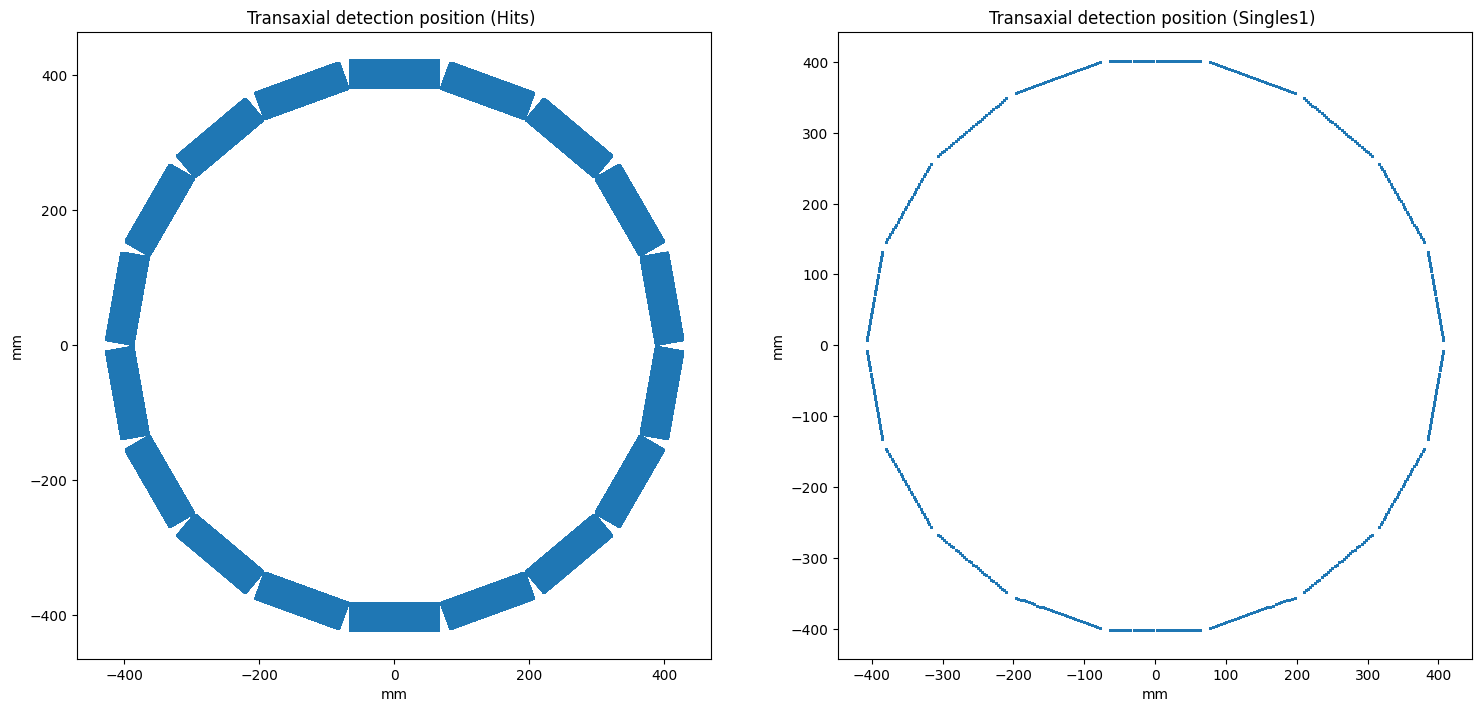

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

# plot the trans-axial position
plot_position(ax[0], hits, 'Hits')

# idem for the singles
singles1 =  f['Singles1']
plot_position(ax[1], singles1, 'Singles1')

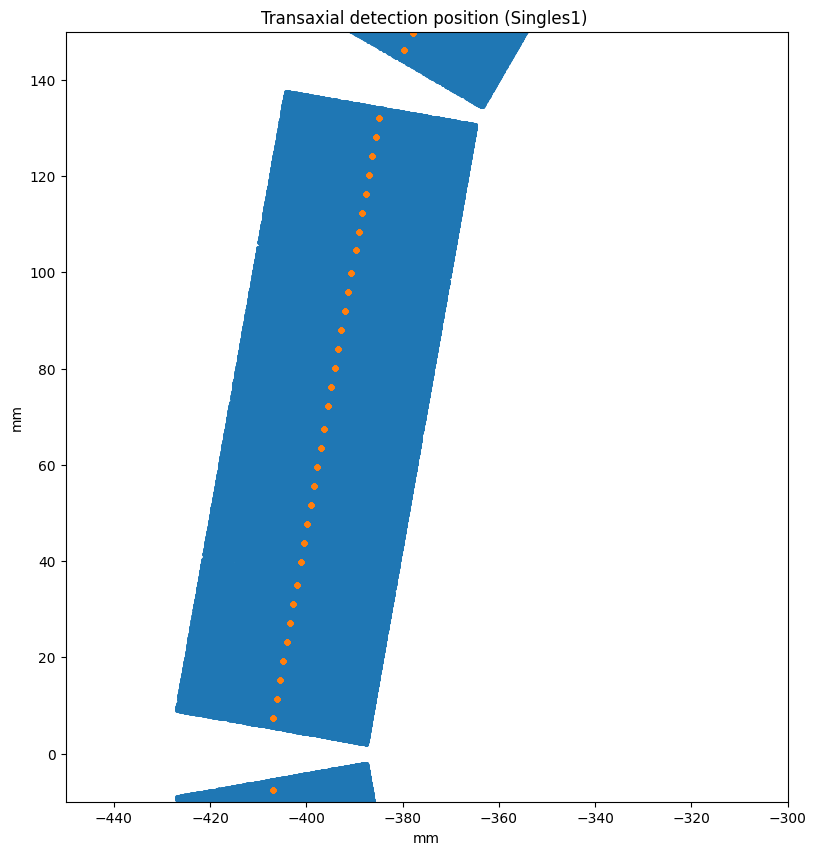

In [7]:
# "zoom" on a given crystal
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# plot the trans-axial position
plot_position(ax, hits, 'Hits', 6)
ax.set_xlim(-450, -300)
ax.set_ylim(-10, 150)

# idem for the singles
singles1 =  f['Singles1']
plot_position(ax, singles1, 'Singles1', 10)


# Plot the energy  of the hits and singles

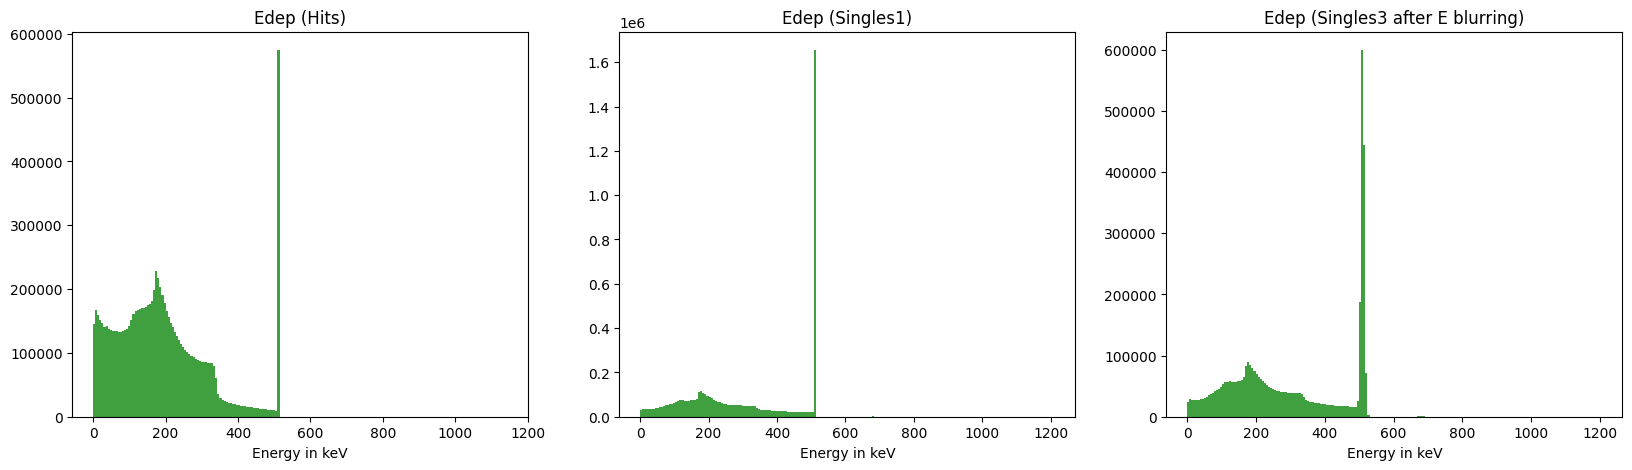

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# hits
energy = hits.arrays()['TotalEnergyDeposit']/0.001
a = ax[0]
n, bins, patches = a.hist(energy, 200, facecolor='green', alpha=0.75)
a.set_title('Edep (Hits)')
a.set_xlabel('Energy in keV');

# singles
energy = singles1.arrays()['TotalEnergyDeposit']/0.001
a = ax[1]
n, bins, patches = a.hist(energy, 200, facecolor='green', alpha=0.75)
a.set_title('Edep (Singles1)')
a.set_xlabel('Energy in keV');


# singles after E blurring 
singles3 =  f['Singles3']
energy = singles3.arrays()['TotalEnergyDeposit']/0.001
a = ax[2]
n, bins, patches = a.hist(energy, 200, facecolor='green', alpha=0.75)
a.set_title('Edep (Singles3 after E blurring)')
a.set_xlabel('Energy in keV');



Text(0.5, 0, 'Time in ns')

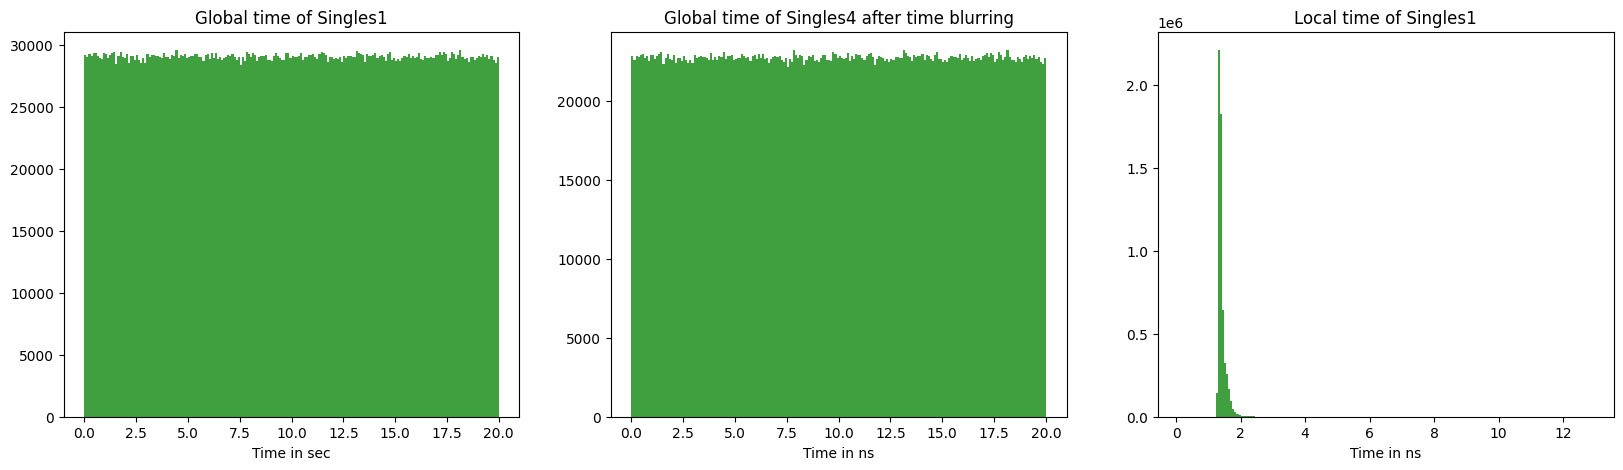

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# singles
times = singles1.arrays()['GlobalTime']/1e9
a = ax[0]
n, bins, patches = a.hist(times, 200, facecolor='green', alpha=0.75)
a.set_title('Global time of Singles1')
a.set_xlabel('Time in sec')

# singles after E blurring 
singles4 =  f['Singles4']
times = singles4.arrays()['GlobalTime']/1e9
a = ax[1]
n, bins, patches = a.hist(times, 200, facecolor='green', alpha=0.75)
a.set_title('Global time of Singles4 after time blurring')
a.set_xlabel('Time in ns')

# singles
times = singles1.arrays()['LocalTime']
a = ax[2]
n, bins, patches = a.hist(times, 200, facecolor='green', alpha=0.75)
a.set_title('Local time of Singles1')
a.set_xlabel('Time in ns')




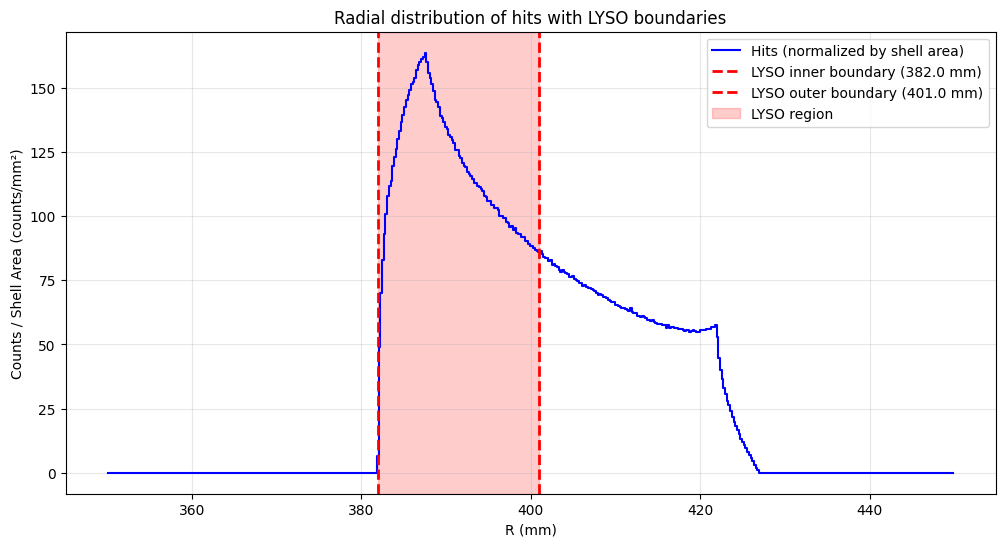

In [10]:


# Calculate radial distance
position_x = p.tget(hits, 'PostPosition_X')
position_y = p.tget(hits, 'PostPosition_Y')
r = (position_x**2 + position_y**2)**0.5

# Define bins

bins = np.linspace(350, 450, 500)
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_width = bins[1] - bins[0]

# Create histogram
counts, _ = np.histogram(r, bins=bins)

# Calculate shell area normalization (2D case)
shell_area = 2 * np.pi * bin_centers * bin_width
normalized_counts = counts / shell_area

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(bin_centers, normalized_counts, drawstyle='steps-mid', color='blue', label='Hits (normalized by shell area)')

# Add LYSO boundaries
lyso_inner = 382.0  # mm
lyso_outer = 401.0  # mm

ax.axvline(lyso_inner, color='red', linestyle='--', linewidth=2, label=f'LYSO inner boundary ({lyso_inner} mm)')
ax.axvline(lyso_outer, color='red', linestyle='--', linewidth=2, label=f'LYSO outer boundary ({lyso_outer} mm)')

# Shade the LYSO region
ax.axvspan(lyso_inner, lyso_outer, alpha=0.2, color='red', label='LYSO region')

#plt.ylim(0, 0.25)
ax.set_xlabel('R (mm)')
ax.set_ylabel('Counts / Shell Area (counts/mm²)')
ax.set_title('Radial distribution of hits with LYSO boundaries')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

In [11]:
singles5 =  f['Singles5']
energy = singles5.arrays()['TotalEnergyDeposit']/0.001
energy = np.sort(energy)
numwindow = np.size(energy)
print(energy)
TotEnergy = sum(energy)
singles4 =  f['Singles4']
singles = singles4.arrays()['TotalEnergyDeposit']/0.001
singles3energy = sum(singles)
numwindowless = np.size(singles)

print(singles3energy/(len(singles)*511))
print(TotEnergy/(len(singles)*511))
print(numwindow/numwindowless)
print(numwindow)

[490, 490, 490, 490, 490, 490, 490, 490, ..., 532, 532, 532, 532, 532, 532, 532]
0.5907580597615354
0.2953574042795405
0.29560195011625995
1344651


In [12]:
from scipy.ndimage import gaussian_filter
from scipy.ndimage import gaussian_filter1d
from numpy import exp, angle, abs
singles5 =  f['Singles5']
#position = singles5.arrays()['PostPosition']
position_x = singles5.arrays()['PostPosition_X']
position_y = singles5.arrays()['PostPosition_Y']
position_z = singles5.arrays()['PostPosition_Z']
position = np.stack((position_x, position_y, position_z), axis=-1)
def cart2sph(x, y, z):
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    phi = np.arctan2(hxy, z)
    theta = np.arctan2(y, x)
    return phi, theta, r
def sph2cart(phi, theta, r):
    x = r * np.cos(theta) * np.sin(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(phi)
    return x, y, z
phi, theta, r = cart2sph(position_x, position_y, position_z)
blurR = np.random.normal(r, 1)
blurTheta = np.random.normal(theta, 0.2378 / blurR)
blurPhi = np.random.normal(phi, 0.2378 / blurR)
#use 0.4247 for LYSO and 0.2378 for LXe
position_xx, position_yy, position_zz = sph2cart(blurPhi, blurTheta, blurR)
print(position_xx[0])
print(position_yy[0])
print(position_zz[0])
print(position_x[0])
print(position_y[0])
print(position_z[0])
#blurred = gaussian_filter(position, sigma = 0.2378 * mm)
#position_x = blurred[:,0]
#position_y = blurred[:,1]

14.453112577787845
-402.0261356633231
-5.878841348378203
14.424999999999908
-402.0
-6.0


In [13]:
# Continue from your existing code...
# You already have: f = uproot.open(filename)

# Get Singles5 and examine it
singles5 = f['Singles5']
print()
print(f'Singles5 tree:')
print(f'Number of events: {singles5.num_entries}')
print('Available branches:')
for b in singles5:
    print(f'  - {b.name}')

# Load Singles5 data
print('\n📥 Loading Singles5 data...')
data = singles5.arrays()

data = ak.with_field(data, position_xx, "PostPosition_X")
data = ak.with_field(data, position_yy, "PostPosition_Y")
data = ak.with_field(data, position_zz, "PostPosition_Z")
# data["PostPosition_X"] = position_xx
# data["PostPosition_Y"] = position_yy
# data["PostPosition_Z"] = position_zz

#take random sample
# N = 100000
#
# N = min(N, len(data))
# random_indicies = np.random.permutation(len(data))[:N]
# sample = data[random_indicies]
# data = sample

# Extract the key data we need
global_time = data["GlobalTime"]
# Position data is stored as separate X, Y, Z components
#
# x = position_xx
# y = position_yy
# z = position_zz
x = data["PostPosition_X"]
y = data["PostPosition_Y"]
z = data["PostPosition_Z"]

energy = data["TotalEnergyDeposit"]
volume_id = data["PreStepUniqueVolumeID"]

print(f'✅ Loaded {len(global_time):,} singles events')

# Convert to numpy arrays
import numpy as np
x = np.array(x)
y = np.array(y)
z = np.array(z)
# x = position_xx
# y = position_yy
# z = position_zz

print(f'\n📊 Data ranges:')
print(f'  Time: {np.min(global_time):.3f} to {np.max(global_time):.3f}')
print(f'  X: {np.min(x):.1f} to {np.max(x):.1f} mm')
print(f'  Y: {np.min(y):.1f} to {np.max(y):.1f} mm')
print(f'  Z: {np.min(z):.1f} to {np.max(z):.1f} mm')
print(f'  Energy: {np.min(energy):.1f} to {np.max(energy):.1f}')
print(f'  Unique detectors: {len(np.unique(volume_id))}')

# NOW with correct time window for nanoseconds!
print(f'🔄 Creating coincidences with proper time window...')

# Debug: Let's see what's happening with the timing
print("🔍 Debugging timing issues...")

# Check time differences between consecutive events
global_time_np = np.array(global_time)
sorted_times = np.sort(global_time_np)
time_diffs = np.diff(sorted_times)

print(f"Time difference statistics:")
print(f"  Minimum: {time_diffs.min():.6f} ns")
print(f"  Mean: {time_diffs.mean():.6f} ns")
print(f"  Median: {np.median(time_diffs):.6f} ns")
print(f"  Maximum: {time_diffs.max():.6f} ns")

# Count how many events are within different time windows
close_counts = []
windows = [0.1, 1.0, 4.5, 10.0, 50.0, 100.0]
for window in windows:
    count = np.sum(time_diffs <= window)
    close_counts.append(count)
    print(f"  Events within {window:5.1f} ns: {count}")
# Fixed coincidence algorithm - ignore the volume ID restriction
print(f'🔧 Fixed coincidence algorithm - using distance instead of volume ID...')

time_window = 4.5  # nanoseconds
global_time_np = np.array(global_time)
energy_np = np.array(energy)

# Sort by time for efficient search
time_order = np.argsort(global_time_np)
sorted_times = global_time_np[time_order]

coincidences = {
    'globalPosX1': [], 'globalPosY1': [], 'globalPosZ1': [],
    'globalPosX2': [], 'globalPosY2': [], 'globalPosZ2': [],
    'time1': [], 'time2': [],
    'energy1': [], 'energy2': [],
    'distance': []  # Add distance to filter close detectors
}

n_singles = len(sorted_times)
processed = set()

print(f'Searching {n_singles:,} singles for coincidences...')

for i in range(n_singles - 1):
    if i in processed:
        continue

    idx1 = time_order[i]
    time1 = sorted_times[i]

    # Look for partner within time window
    j = i + 1
    while j < n_singles and (sorted_times[j] - time1) <= time_window:
        if j in processed:
            j += 1
            continue

        idx2 = time_order[j]

        # Instead of volume ID, use POSITION to avoid same detector
        # Calculate distance between detection points
        dx = x[idx1] - x[idx2]
        dy = y[idx1] - y[idx2]
        dz = z[idx1] - z[idx2]
        distance = np.sqrt(dx**2 + dy**2 + dz**2)

        # Only accept if detectors are reasonably far apart (> 2cm)
        # This avoids same crystal or very adjacent crystals
        if distance > 20.0:  # 20mm minimum separation

            # Store coincidence
            coincidences['globalPosX1'].append(x[idx1])
            coincidences['globalPosY1'].append(y[idx1])
            coincidences['globalPosZ1'].append(z[idx1])

            coincidences['globalPosX2'].append(x[idx2])
            coincidences['globalPosY2'].append(y[idx2])
            coincidences['globalPosZ2'].append(z[idx2])

            coincidences['time1'].append(global_time_np[idx1])
            coincidences['time2'].append(global_time_np[idx2])

            coincidences['energy1'].append(energy_np[idx1])
            coincidences['energy2'].append(energy_np[idx2])

            coincidences['distance'].append(distance)

            processed.add(i)
            processed.add(j)
            break

        j += 1

# Convert to numpy arrays

for key in coincidences:
    coincidences[key] = np.array(coincidences[key])

n_coinc = len(coincidences['globalPosX1'])
print(f'\n✅ Created {n_coinc:,} coincidences from {n_singles:,} singles')
print(f'   Coincidence rate: {n_coinc/n_singles*100:.1f}%')
print(type(coincidences))

# N = 100000
# length = len(next(iter(coincidences.values())))
# N = min(N, length)
# random_indices = np.random.permutation(length)[:N]
# coincidences_temp = {key: value[random_indices] for key, value in coincidences.items()}
# # N = len(coincidences)
# #
# # N = min(N, len(coincidences))
# # random_indicies = np.random.permutation(len(coincidences))[:N]
# # coincidences = coincidences[random_indicies]
# #
# print(f'took a random sample of {N} coincidences')


Singles5 tree:
Number of events: 1344651.0
Available branches:
  - PostPosition_X
  - PostPosition_Y
  - PostPosition_Z
  - TotalEnergyDeposit
  - PreStepUniqueVolumeID
  - GlobalTime
  - LocalTime

📥 Loading Singles5 data...
✅ Loaded 1,344,651 singles events

📊 Data ranges:
  Time: 8392.531 to 19999966688.998
  X: -410.1 to 410.5 mm
  Y: -405.9 to 406.5 mm
  Z: -80.9 to 81.1 mm
  Energy: 0.5 to 0.5
  Unique detectors: 23040
🔄 Creating coincidences with proper time window...
🔍 Debugging timing issues...
Time difference statistics:
  Minimum: 0.000000 ns
  Mean: 14873.727956 ns
  Median: 9784.871702 ns
  Maximum: 219840.241051 ns
  Events within   0.1 ns: 94092
  Events within   1.0 ns: 122580
  Events within   4.5 ns: 122858
  Events within  10.0 ns: 123258
  Events within  50.0 ns: 126184
  Events within 100.0 ns: 129851
🔧 Fixed coincidence algorithm - using distance instead of volume ID...
Searching 1,344,651 singles for coincidences...

✅ Created 122,798 coincidences from 1,344,651

⏰ TIME DISTRIBUTION ANALYSIS
Testing if we have simultaneous gamma pairs from annihilation

📊 Coincidence timing statistics:
Number of coincidence pairs: 122798
Time differences (ns):
  Mean: 0.072
  Median: 0.056
  Std dev: 0.136
  Min: 0.000
  Max: 4.487


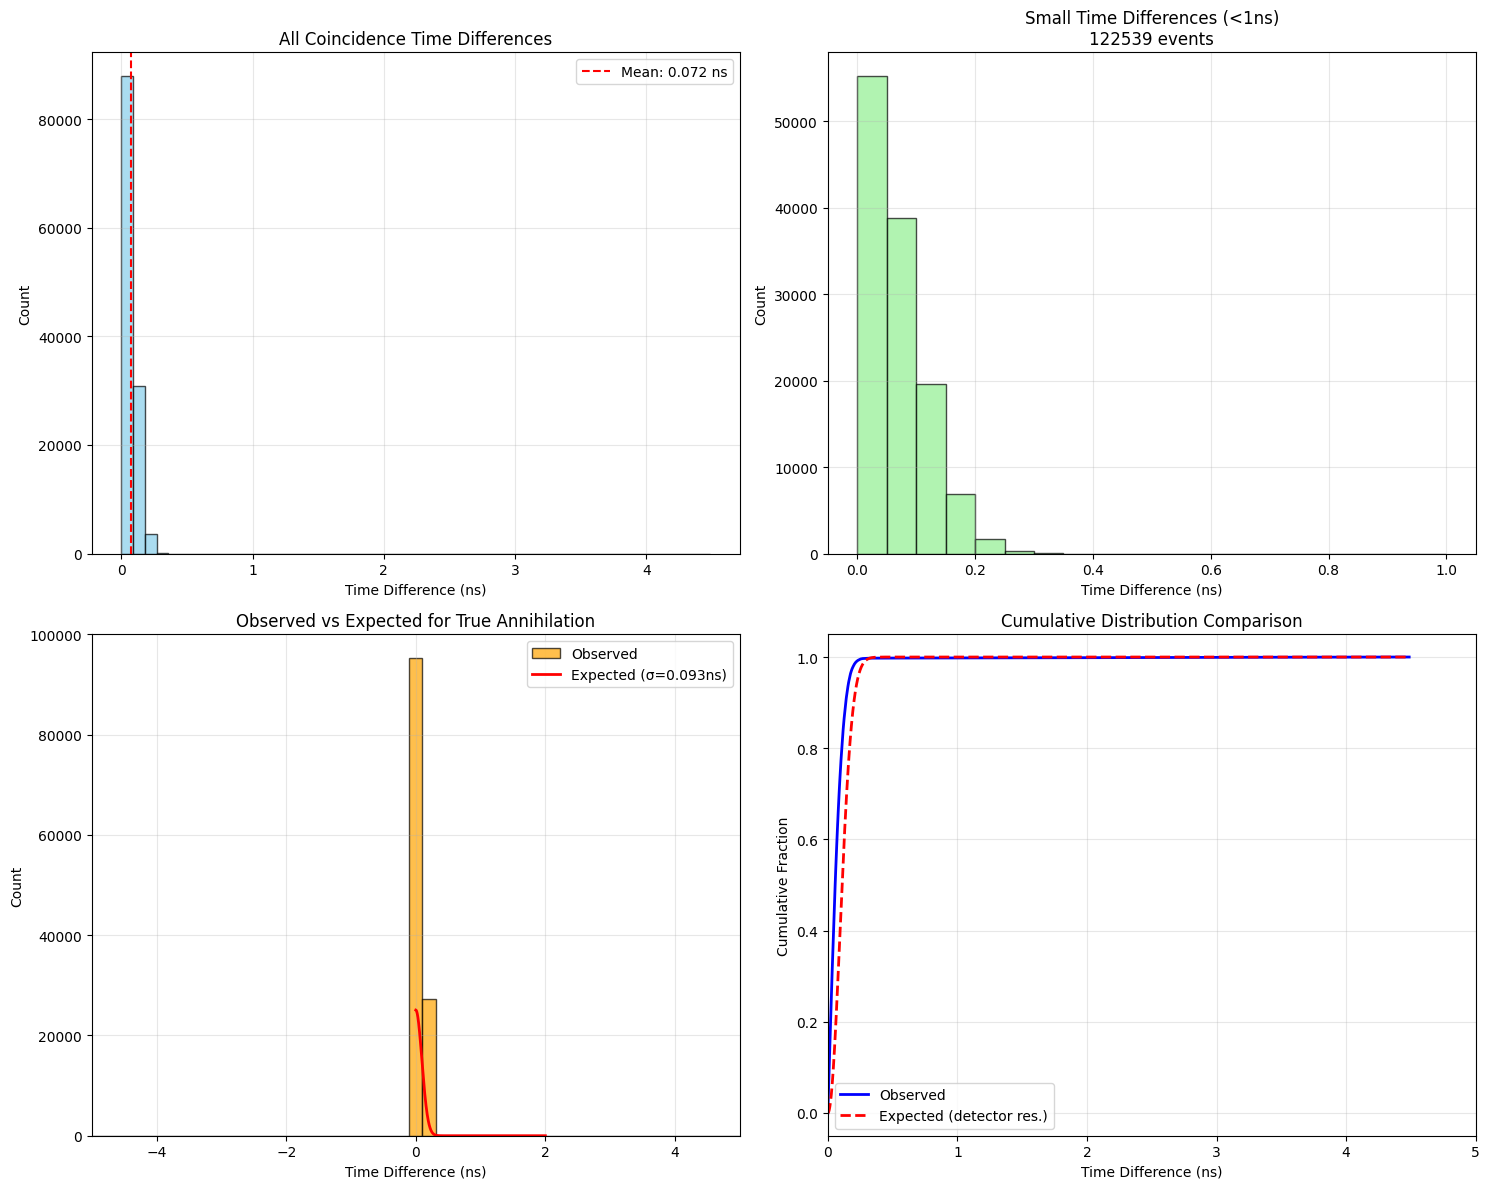


🔍 DETAILED TIMING ANALYSIS:
Events with time difference:
  < 0.5 ns: 122516 (99.8%)
  < 1.0 ns: 122539 (99.8%)
  < 2.0 ns: 122619 (99.9%)
  < 220 ps (1σ detector res): 121545 (99.0%)
  < 440 ps (2σ detector res): 122508 (99.8%)

🎯 PHYSICS INTERPRETATION:
✅ GOOD: >50% of events have Δt < 500ps
   → Consistent with true simultaneous gamma pairs
   → Detector time resolution is dominant factor

📊 RANDOM COINCIDENCE CHECK:
Expected random coincidences: 0.0
Observed coincidences: 122798
✅ Far more coincidences than random → Real physics!

🎯 BOTTOM LINE:
The timing distribution tells us whether these are:
  1. True simultaneous annihilation gamma pairs
  2. Scattered/delayed gamma rays
  3. Random coincidences
  4. Detector background processes


In [14]:
# Time distribution analysis - Testing for simultaneous gamma pairs

import matplotlib.pyplot as plt
import numpy as np

print("⏰ TIME DISTRIBUTION ANALYSIS")
print("Testing if we have simultaneous gamma pairs from annihilation")

# Get the coincidence time differences
if len(coincidences['time1']) > 0:
    time1 = np.array(coincidences['time1'])
    time2 = np.array(coincidences['time2'])
    time_diff = np.abs(time2 - time1)

    print(f"\n📊 Coincidence timing statistics:")
    print(f"Number of coincidence pairs: {len(time_diff)}")
    print(f"Time differences (ns):")
    print(f"  Mean: {np.mean(time_diff):.3f}")
    print(f"  Median: {np.median(time_diff):.3f}")
    print(f"  Std dev: {np.std(time_diff):.3f}")
    print(f"  Min: {np.min(time_diff):.3f}")
    print(f"  Max: {np.max(time_diff):.3f}")

    # Create detailed time difference histogram
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Full range time differences
    ax1.hist(time_diff, bins=50, alpha=0.7, edgecolor='black', color='skyblue')
    ax1.set_xlabel('Time Difference (ns)')
    ax1.set_ylabel('Count')
    ax1.set_title('All Coincidence Time Differences')
    ax1.grid(True, alpha=0.3)
    ax1.axvline(x=np.mean(time_diff), color='red', linestyle='--',
               label=f'Mean: {np.mean(time_diff):.3f} ns')
    ax1.legend()

    # 2. Zoomed in - very small time differences (true simultaneous events)
    small_times = time_diff[time_diff <= 1.0]  # Less than 1 ns
    if len(small_times) > 0:
        ax2.hist(small_times, bins=20, alpha=0.7, edgecolor='black', color='lightgreen')
        ax2.set_xlabel('Time Difference (ns)')
        ax2.set_ylabel('Count')
        ax2.set_title(f'Small Time Differences (<1ns)\n{len(small_times)} events')
        ax2.grid(True, alpha=0.3)
    else:
        ax2.text(0.5, 0.5, 'No events\nwith Δt < 1ns',
                ha='center', va='center', transform=ax2.transAxes, fontsize=14)
        ax2.set_title('Small Time Differences (<1ns)')

    # 3. Expected vs observed for true annihilation
    # True annihilation should have time differences dominated by:
    # - Detector time resolution (~200-500 ps)
    # - Transit time differences (few ns max)

    expected_bins = np.linspace(-5, 5, 50)

    # Theoretical distribution for true coincidences
    # Should be sharply peaked near 0 with detector resolution spread
    detector_resolution = 0.22  # ns (220 ps FWHM from digitizer)
    sigma = detector_resolution / 2.355  # Convert FWHM to sigma

    # Generate theoretical curve
    theoretical_times = np.linspace(0, 2, 1000)
    # For truly simultaneous events, time difference should follow detector resolution
    theoretical_curve = np.exp(-theoretical_times**2 / (2 * sigma**2))
    theoretical_curve *= len(time_diff) * (expected_bins[1] - expected_bins[0])  # Normalize

    # Plot comparison
    ax3.hist(time_diff, bins=expected_bins, alpha=0.7, edgecolor='black',
            color='orange', label='Observed')
    ax3.plot(theoretical_times, theoretical_curve, 'r-', linewidth=2,
            label=f'Expected (σ={sigma:.3f}ns)')
    ax3.set_xlabel('Time Difference (ns)')
    ax3.set_ylabel('Count')
    ax3.set_title('Observed vs Expected for True Annihilation')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_xlim(-5, 5)

    # 4. Cumulative distribution analysis
    sorted_times = np.sort(time_diff)
    cumulative = np.arange(1, len(sorted_times) + 1) / len(sorted_times)

    ax4.plot(sorted_times, cumulative, 'b-', linewidth=2, label='Observed')

    # Expected cumulative for detector-limited resolution
    theoretical_cumulative = 1 - np.exp(-sorted_times**2 / (2 * sigma**2))
    ax4.plot(sorted_times, theoretical_cumulative, 'r--', linewidth=2,
            label='Expected (detector res.)')

    ax4.set_xlabel('Time Difference (ns)')
    ax4.set_ylabel('Cumulative Fraction')
    ax4.set_title('Cumulative Distribution Comparison')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.set_xlim(0, 5)

    plt.tight_layout()
    plt.show()

    # Statistical analysis
    print(f"\n🔍 DETAILED TIMING ANALYSIS:")

    # Check fraction of very close events
    very_close = np.sum(time_diff < 0.5)  # < 500 ps
    close = np.sum(time_diff < 1.0)       # < 1 ns
    medium = np.sum(time_diff < 2.0)      # < 2 ns

    print(f"Events with time difference:")
    print(f"  < 0.5 ns: {very_close} ({very_close/len(time_diff)*100:.1f}%)")
    print(f"  < 1.0 ns: {close} ({close/len(time_diff)*100:.1f}%)")
    print(f"  < 2.0 ns: {medium} ({medium/len(time_diff)*100:.1f}%)")

    # Expected detector time resolution is 220 ps FWHM
    # So 68% should be within ~100 ps, 95% within ~200 ps
    expected_within_220ps = np.sum(time_diff < 0.22)
    expected_within_440ps = np.sum(time_diff < 0.44)

    print(f"  < 220 ps (1σ detector res): {expected_within_220ps} ({expected_within_220ps/len(time_diff)*100:.1f}%)")
    print(f"  < 440 ps (2σ detector res): {expected_within_440ps} ({expected_within_440ps/len(time_diff)*100:.1f}%)")

    print(f"\n🎯 PHYSICS INTERPRETATION:")

    if very_close/len(time_diff) > 0.5:
        print("✅ GOOD: >50% of events have Δt < 500ps")
        print("   → Consistent with true simultaneous gamma pairs")
        print("   → Detector time resolution is dominant factor")
    elif close/len(time_diff) > 0.3:
        print("⚠️  MIXED: 30-50% have Δt < 1ns")
        print("   → Mix of true coincidences and other processes")
        print("   → Some may be scattered or delayed events")
    else:
        print("❌ POOR: <30% have Δt < 1ns")
        print("   → Most events are NOT simultaneous")
        print("   → Likely scattered, random, or secondary processes")

    # Compare with random expectation
    print(f"\n📊 RANDOM COINCIDENCE CHECK:")
    total_time_span = 2.0e9  # 2 seconds in ns
    n_singles = 2081
    random_rate = (n_singles / total_time_span)**2 * 4.5 * total_time_span
    print(f"Expected random coincidences: {random_rate:.1f}")
    print(f"Observed coincidences: {len(time_diff)}")

    if len(time_diff) > random_rate * 10:
        print("✅ Far more coincidences than random → Real physics!")
    elif len(time_diff) > random_rate * 2:
        print("⚠️  More coincidences than random, but not overwhelming")
    else:
        print("❌ Close to random expectation")

else:
    print("❌ No coincidence data available for timing analysis")

print(f"\n🎯 BOTTOM LINE:")
print(f"The timing distribution tells us whether these are:")
print(f"  1. True simultaneous annihilation gamma pairs")
print(f"  2. Scattered/delayed gamma rays")
print(f"  3. Random coincidences")
print(f"  4. Detector background processes")

In [15]:
coincidences.keys()

dict_keys(['globalPosX1', 'globalPosY1', 'globalPosZ1', 'globalPosX2', 'globalPosY2', 'globalPosZ2', 'time1', 'time2', 'energy1', 'energy2', 'distance'])

In [16]:
# Simple PET Reconstruction Algorithm
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

print("🔬 PET IMAGE RECONSTRUCTION")
print("Simple back-projection algorithm for annihilation gamma pairs")

from scipy import ndimage

def reconstruct_pet_image(coincidences, image_size=128, pixel_size=8.0, method='backprojection', **kwargs):
    """
    Correct PET reconstruction - drop-in replacement for your original function

    Parameters:
    coincidences: dict with keys ['globalPosX1', 'globalPosY1', 'globalPosZ1',
                                  'globalPosX2', 'globalPosY2', 'globalPosZ2',
                                  'time1', 'time2', 'energy1', 'energy2', 'distance']
    image_size: number of pixels per side (assuming square image)
    pixel_size: size of each pixel in mm
    method: 'backprojection' or 'mlem' or 'midpoint' (for comparison)
    **kwargs: additional parameters (z_slice, z_tolerance, n_iterations)
    """

    if method == 'backprojection':
        return correct_backprojection_reconstruction(coincidences, image_size, pixel_size, **kwargs)
    elif method == 'mlem':
        return mlem_reconstruction_simple(coincidences, image_size, pixel_size, **kwargs)
    elif method == 'midpoint':
        return midpoint_reconstruction(coincidences, image_size, pixel_size, **kwargs)
    else:
        print(f"❌ Unknown method: {method}")
        return np.zeros((image_size, image_size))

def correct_backprojection_reconstruction(coincidences, image_size=128, pixel_size=8.0,
                                        z_slice=0, z_tolerance=50):
    """
    Correct back-projection reconstruction for PET data

    KEY DIFFERENCE: Distributes intensity along ENTIRE LOR, not just at midpoint
    """

    # Initialize image matrix
    image = np.zeros((image_size, image_size))

    # Get coincidence data
    if len(coincidences.get('energy1', [])) == 0:
        print("❌ No coincidence data available")
        return image

    print(f"\n📊 CORRECT Back-Projection Reconstruction:")
    print(f"Image size: {image_size} x {image_size} pixels")
    print(f"Pixel size: {pixel_size} mm")
    print(f"Field of view: {image_size * pixel_size} x {image_size * pixel_size} mm²")
    print(f"Z slice: {z_slice} ± {z_tolerance} mm")
    print(f"Number of coincidences: {len(coincidences['energy1'])}")

    # Convert to numpy arrays for efficiency
    x1_coords = np.array(coincidences['globalPosX1'])
    y1_coords = np.array(coincidences['globalPosY1'])
    z1_coords = np.array(coincidences['globalPosZ1'])
    x2_coords = np.array(coincidences['globalPosX2'])
    y2_coords = np.array(coincidences['globalPosY2'])
    z2_coords = np.array(coincidences['globalPosZ2'])
    energy1 = np.array(coincidences['energy1'])
    energy2 = np.array(coincidences['energy2'])

    print(f"Coordinate ranges:")
    print(f"  X: {np.min(np.concatenate([x1_coords, x2_coords])):.1f} to {np.max(np.concatenate([x1_coords, x2_coords])):.1f} mm")
    print(f"  Y: {np.min(np.concatenate([y1_coords, y2_coords])):.1f} to {np.max(np.concatenate([y1_coords, y2_coords])):.1f} mm")
    print(f"  Z: {np.min(np.concatenate([z1_coords, z2_coords])):.1f} to {np.max(np.concatenate([z1_coords, z2_coords])):.1f} mm")

    # Energy filtering
    energy_mask = (energy1 > 0.4) & (energy1 < 0.65) & (energy2 > 0.4) & (energy2 < 0.65)

    # Z-slice filtering (for 2D reconstruction)
    z_mask = ((np.minimum(z1_coords, z2_coords) <= z_slice + z_tolerance) &
              (np.maximum(z1_coords, z2_coords) >= z_slice - z_tolerance))

    # Combined mask
    valid_mask = energy_mask & z_mask

    print(f"Events passing energy filter: {np.sum(energy_mask)} ({100*np.sum(energy_mask)/len(energy1):.1f}%)")
    print(f"Events passing Z filter: {np.sum(z_mask)} ({100*np.sum(z_mask)/len(energy1):.1f}%)")
    print(f"Events passing both filters: {np.sum(valid_mask)} ({100*np.sum(valid_mask)/len(energy1):.1f}%)")

    if np.sum(valid_mask) < 10:
        print("❌ Too few valid events for reconstruction")
        return image

    # Filter data
    x1_valid = x1_coords[valid_mask]
    y1_valid = y1_coords[valid_mask]
    x2_valid = x2_coords[valid_mask]
    y2_valid = y2_coords[valid_mask]
    e1_valid = energy1[valid_mask]
    e2_valid = energy2[valid_mask]

    center = image_size // 2
    valid_events = 0

    print("Processing LORs...")

    # Process each LOR
    for i in range(len(x1_valid)):
        if i % 1000 == 0:
            print(f"  Processing LOR {i+1}/{len(x1_valid)}")

        # Convert detector positions to image coordinates
        ix1 = int(center + x1_valid[i] / pixel_size)
        iy1 = int(center + y1_valid[i] / pixel_size)
        ix2 = int(center + x2_valid[i] / pixel_size)
        iy2 = int(center + y2_valid[i] / pixel_size)

        # Energy-based weight
        weight1 = np.exp(-((e1_valid[i] - 0.511)**2) / (2 * 0.05**2))
        weight2 = np.exp(-((e2_valid[i] - 0.511)**2) / (2 * 0.05**2))
        weight = weight1 * weight2

        # Draw line using improved Bresenham's algorithm
        points = bresenham_line(ix1, iy1, ix2, iy2)

        # Add weight to all pixels along the LOR
        pixels_added = 0
        for px, py in points:
            if 0 <= px < image_size and 0 <= py < image_size:
                image[py, px] += weight
                pixels_added += 1

        if pixels_added > 0:
            valid_events += 1

    print(f"Valid events used for reconstruction: {valid_events}")
    print(f"Total intensity in image: {np.sum(image):.0f}")
    print(f"Maximum pixel value: {np.max(image):.1f}")

    return image

def bresenham_line(x0, y0, x1, y1):
    """
    Bresenham's line algorithm to get all pixels along a line
    Returns list of (x, y) coordinates
    """
    points = []

    dx = abs(x1 - x0)
    dy = abs(y1 - y0)

    x_step = 1 if x0 < x1 else -1
    y_step = 1 if y0 < y1 else -1

    error = dx - dy

    x, y = x0, y0

    while True:
        points.append((x, y))

        if x == x1 and y == y1:
            break

        error2 = 2 * error

        if error2 > -dy:
            error -= dy
            x += x_step

        if error2 < dx:
            error += dx
            y += y_step

    return points

def mlem_reconstruction_simple(coincidences, image_size=128, pixel_size=8.0,
                              n_iterations=10, z_slice=0, z_tolerance=50):
    """
    Simple MLEM reconstruction - much better for multiple sources
    """

    print(f"\n🚀 MLEM Reconstruction ({n_iterations} iterations):")
    print(f"Image size: {image_size} x {image_size} pixels")
    print(f"Pixel size: {pixel_size} mm")

    if len(coincidences.get('energy1', [])) == 0:
        print("❌ No coincidence data available")
        return np.zeros((image_size, image_size))

    # Convert to numpy arrays
    x1_coords = np.array(coincidences['globalPosX1'])
    y1_coords = np.array(coincidences['globalPosY1'])
    z1_coords = np.array(coincidences['globalPosZ1'])
    x2_coords = np.array(coincidences['globalPosX2'])
    y2_coords = np.array(coincidences['globalPosY2'])
    z2_coords = np.array(coincidences['globalPosZ2'])
    energy1 = np.array(coincidences['energy1'])
    energy2 = np.array(coincidences['energy2'])

    # Filtering
    energy_mask = (energy1 > 0.4) & (energy1 < 0.65) & (energy2 > 0.4) & (energy2 < 0.65)
    z_mask = ((np.minimum(z1_coords, z2_coords) <= z_slice + z_tolerance) &
              (np.maximum(z1_coords, z2_coords) >= z_slice - z_tolerance))
    valid_mask = energy_mask & z_mask

    print(f"Using {np.sum(valid_mask)} valid events")

    if np.sum(valid_mask) < 50:
        print("❌ Too few events for MLEM")
        return np.zeros((image_size, image_size))

    # Filter data
    x1_valid = x1_coords[valid_mask]
    y1_valid = y1_coords[valid_mask]
    x2_valid = x2_coords[valid_mask]
    y2_valid = y2_coords[valid_mask]
    e1_valid = energy1[valid_mask]
    e2_valid = energy2[valid_mask]

    center = image_size // 2

    # Pre-compute system matrix (which pixels each LOR passes through)
    print("Computing system matrix...")
    lors = []
    weights = []

    for i in range(len(x1_valid)):
        ix1 = int(center + x1_valid[i] / pixel_size)
        iy1 = int(center + y1_valid[i] / pixel_size)
        ix2 = int(center + x2_valid[i] / pixel_size)
        iy2 = int(center + y2_valid[i] / pixel_size)

        points = bresenham_line(ix1, iy1, ix2, iy2)
        valid_points = [(px, py) for px, py in points
                       if 0 <= px < image_size and 0 <= py < image_size]

        if len(valid_points) > 0:
            lors.append(valid_points)

            # Energy weight
            weight = np.exp(-((e1_valid[i] - 0.511)**2 + (e2_valid[i] - 0.511)**2) / (2 * 0.05**2))
            weights.append(weight)

    print(f"System matrix computed for {len(lors)} LORs")

    if len(lors) == 0:
        print("❌ No valid LORs found")
        return np.zeros((image_size, image_size))

    # Initialize image with uniform distribution
    image = np.ones((image_size, image_size)) * 0.1

    # MLEM iterations
    for iteration in range(n_iterations):
        print(f"MLEM iteration {iteration + 1}/{n_iterations}")

        # Forward projection: compute expected counts for each LOR
        expected_counts = np.zeros(len(lors))
        for lor_idx, points in enumerate(lors):
            for px, py in points:
                expected_counts[lor_idx] += image[py, px]

        # Avoid division by zero
        expected_counts[expected_counts < 1e-10] = 1e-10

        # Back projection with correction
        correction_image = np.zeros_like(image)
        normalization_image = np.zeros_like(image)

        for lor_idx, points in enumerate(lors):
            # For simplicity, assume measured counts = 1 for each LOR
            correction_factor = weights[lor_idx] / expected_counts[lor_idx]

            for px, py in points:
                correction_image[py, px] += correction_factor
                normalization_image[py, px] += 1.0

        # Update image
        normalization_image[normalization_image < 1e-10] = 1e-10
        correction_image /= normalization_image
        image *= correction_image

        # Optional smoothing to reduce noise
        if iteration > 2:
            image = ndimage.gaussian_filter(image, sigma=0.8)

        # Ensure non-negative
        image[image < 0] = 0

        total_intensity = np.sum(image)
        print(f"  Total intensity: {total_intensity:.0f}")

        # Stop if converged
        if iteration > 5 and total_intensity < 1e-6:
            print("  Converged (low intensity)")
            break

    return image

def midpoint_reconstruction(coincidences, image_size=128, pixel_size=8.0,
                          z_slice=0, z_tolerance=50):
    """
    Your original midpoint method - kept for comparison
    """

    print(f"\n📍 Midpoint Reconstruction (for comparison):")
    print(f"⚠️  This is the WRONG method - kept only for comparison!")

    # Initialize image matrix
    image = np.zeros((image_size, image_size))

    if len(coincidences.get('energy1', [])) == 0:
        print("❌ No coincidence data available")
        return image

    # Convert to numpy arrays
    x1_coords = np.array(coincidences['globalPosX1'])
    y1_coords = np.array(coincidences['globalPosY1'])
    z1_coords = np.array(coincidences['globalPosZ1'])
    x2_coords = np.array(coincidences['globalPosX2'])
    y2_coords = np.array(coincidences['globalPosY2'])
    z2_coords = np.array(coincidences['globalPosZ2'])
    energy1 = np.array(coincidences['energy1'])
    energy2 = np.array(coincidences['energy2'])

    # Filtering
    energy_mask = (energy1 > 0.4) & (energy1 < 0.65) & (energy2 > 0.4) & (energy2 < 0.65)
    z_mask = ((np.minimum(z1_coords, z2_coords) <= z_slice + z_tolerance) &
              (np.maximum(z1_coords, z2_coords) >= z_slice - z_tolerance))
    valid_mask = energy_mask & z_mask

    if np.sum(valid_mask) < 10:
        print("❌ Too few valid events")
        return image

    # Filter data
    x1_valid = x1_coords[valid_mask]
    y1_valid = y1_coords[valid_mask]
    x2_valid = x2_coords[valid_mask]
    y2_valid = y2_coords[valid_mask]
    e1_valid = energy1[valid_mask]
    e2_valid = energy2[valid_mask]

    # Calculate midpoints (your original method)
    mid_x = (x1_valid + x2_valid) / 2
    mid_y = (y1_valid + y2_valid) / 2

    center = image_size // 2

    # Add to image
    for i in range(len(mid_x)):
        ix = int(center + mid_x[i] / pixel_size)
        iy = int(center + mid_y[i] / pixel_size)

        if 0 <= ix < image_size and 0 <= iy < image_size:
            weight = np.exp(-((e1_valid[i] - 0.511)**2 + (e2_valid[i] - 0.511)**2) / (2 * 0.05**2))

            # Add Gaussian blob around midpoint
            for dx in range(-2, 3):
                for dy in range(-2, 3):
                    nx, ny = ix + dx, iy + dy
                    if 0 <= nx < image_size and 0 <= ny < image_size:
                        gauss_weight = np.exp(-(dx**2 + dy**2) / (2 * 1.5**2))
                        image[ny, nx] += weight * gauss_weight

    print(f"Midpoint reconstruction completed")

    return image

# Usage examples and tests
def test_reconstruction_methods(coincidences):
    """
    Test and compare all reconstruction methods
    """

    print("🧪 TESTING ALL RECONSTRUCTION METHODS")
    print("="*50)

    # Test parameters
    image_size = 128
    pixel_size = 4.0

    # Method 1: Correct back-projection (default)
    print("\n1. Testing correct back-projection...")
    bp_image = reconstruct_pet_image(coincidences, image_size, pixel_size, method='backprojection')

    # Method 2: MLEM
    print("\n2. Testing MLEM...")
    mlem_image = reconstruct_pet_image(coincidences, image_size, pixel_size, method='mlem', n_iterations=10)

    # Method 3: Original midpoint method
    print("\n3. Testing original midpoint method...")
    mid_image = reconstruct_pet_image(coincidences, image_size, pixel_size, method='midpoint')

    # Simple comparison
    print(f"\n📊 COMPARISON:")
    print(f"Back-projection: max={np.max(bp_image):.1f}, sum={np.sum(bp_image):.0f}")
    print(f"MLEM:           max={np.max(mlem_image):.1f}, sum={np.sum(mlem_image):.0f}")
    print(f"Midpoint:       max={np.max(mid_image):.1f}, sum={np.sum(mid_image):.0f}")

    return bp_image, mlem_image, mid_image

# Default: use correct back-projection
print("✅ Correct PET reconstruction functions loaded!")
print("📖 Usage:")
print("  image = reconstruct_pet_image(coincidences)  # Correct back-projection")
print("  image = reconstruct_pet_image(coincidences, method='mlem')  # MLEM")
print("  image = reconstruct_pet_image(coincidences, method='midpoint')  # Original (wrong) method")

def analyze_reconstruction(image, pixel_size):
    """Analyze the reconstructed image"""

    print(f"\n🔍 RECONSTRUCTION ANALYSIS:")
    print(f"Total counts in image: {np.sum(image):.0f}")
    print(f"Maximum pixel value: {np.max(image):.1f}")
    print(f"Mean pixel value: {np.mean(image):.3f}")

    # Find hot spots (potential sources)
    threshold = np.max(image) * 0.1  # 10% of maximum
    hot_pixels = np.where(image > threshold)

    if len(hot_pixels[0]) > 0:
        print(f"Hot spots found: {len(hot_pixels[0])} pixels above {threshold:.1f}")

        # Find center of mass
        total_intensity = np.sum(image)
        if total_intensity > 0:
            center_x = np.sum(np.arange(image.shape[1]) * np.sum(image, axis=0)) / total_intensity
            center_y = np.sum(np.arange(image.shape[0]) * np.sum(image, axis=1)) / total_intensity

            # Convert to physical coordinates
            image_center = image.shape[0] // 2
            phys_x = (center_x - image_center) * pixel_size
            phys_y = (center_y - image_center) * pixel_size

            print(f"Center of mass: ({phys_x:.1f}, {phys_y:.1f}) mm")

    return image

def plot_reconstruction(image, pixel_size):
    """Plot the reconstructed image"""

    fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 6))

    # Physical coordinates
    extent = [-image.shape[1]//2 * pixel_size, image.shape[1]//2 * pixel_size,
              -image.shape[0]//2 * pixel_size, image.shape[0]//2 * pixel_size]

    # 1. Raw reconstruction
    im1 = ax1.imshow(image, extent=extent, cmap='hot', origin='lower')
    ax1.set_title('Raw Back-Projection')
    ax1.set_xlabel('X (mm)')
    ax1.set_ylabel('Y (mm)')
    plt.colorbar(im1, ax=ax1, label='Counts')

    # 2. Log scale (better for weak features)
    log_image = np.log10(image + 1)  # +1 to avoid log(0)
    im2 = ax2.imshow(log_image, extent=extent, cmap='hot', origin='lower')
    ax2.set_title('Log Scale Reconstruction')
    ax2.set_xlabel('X (mm)')
    ax2.set_ylabel('Y (mm)')
    plt.colorbar(im2, ax=ax2, label='Log10(Counts + 1)')

    # 4. Profile plots
    center = image.shape[0] // 2
    x_profile = image[center, :]
    y_profile = image[:, center]

    x_coords = np.arange(len(x_profile)) * pixel_size - len(x_profile)//2 * pixel_size
    y_coords = np.arange(len(y_profile)) * pixel_size - len(y_profile)//2 * pixel_size

    ax3.plot(x_coords, x_profile, 'b-', label='X profile', linewidth=2)
    ax3.plot(y_coords, y_profile, 'r-', label='Y profile', linewidth=2)
    ax3.set_xlabel('Position (mm)')
    ax3.set_xlim(-100,100)
    ax3.set_ylabel('Counts')
    ax3.set_title('Central Profiles')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

🔬 PET IMAGE RECONSTRUCTION
Simple back-projection algorithm for annihilation gamma pairs
✅ Correct PET reconstruction functions loaded!
📖 Usage:
  image = reconstruct_pet_image(coincidences)  # Correct back-projection
  image = reconstruct_pet_image(coincidences, method='mlem')  # MLEM
  image = reconstruct_pet_image(coincidences, method='midpoint')  # Original (wrong) method


🚀 Starting PET reconstruction...

📊 CORRECT Back-Projection Reconstruction:
Image size: 128 x 128 pixels
Pixel size: 8.0 mm
Field of view: 1024.0 x 1024.0 mm²
Z slice: 0 ± 50 mm
Number of coincidences: 122798
Coordinate ranges:
  X: -409.3 to 410.3 mm
  Y: -405.7 to 405.7 mm
  Z: -80.6 to 80.8 mm
Events passing energy filter: 122798 (100.0%)
Events passing Z filter: 122723 (99.9%)
Events passing both filters: 122723 (99.9%)
Processing LORs...
  Processing LOR 1/122723
  Processing LOR 1001/122723
  Processing LOR 2001/122723
  Processing LOR 3001/122723
  Processing LOR 4001/122723
  Processing LOR 5001/122723
  Processing LOR 6001/122723
  Processing LOR 7001/122723
  Processing LOR 8001/122723
  Processing LOR 9001/122723
  Processing LOR 10001/122723
  Processing LOR 11001/122723
  Processing LOR 12001/122723
  Processing LOR 13001/122723
  Processing LOR 14001/122723
  Processing LOR 15001/122723
  Processing LOR 16001/122723
  Processing LOR 17001/122723
  Processing LOR 18001/122

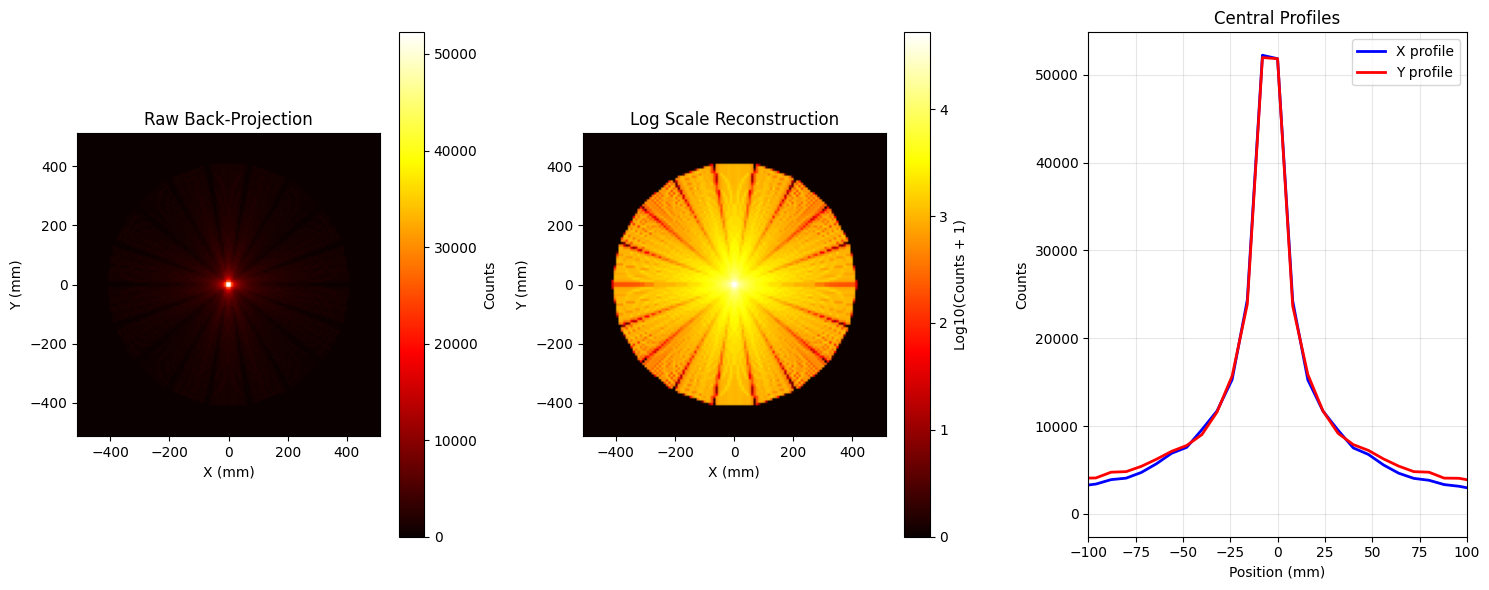

In [17]:
print("🚀 Starting PET reconstruction...")

# Reconstruct image
reconstructed_image = reconstruct_pet_image(coincidences, image_size=128, pixel_size=8.0)

# Analyze results
analyzed_image = analyze_reconstruction(reconstructed_image, pixel_size=8.0)

# Plot results
plot_reconstruction(reconstructed_image, pixel_size=8.0)


📊 CORRECT Back-Projection Reconstruction:
Image size: 128 x 128 pixels
Pixel size: 8.0 mm
Field of view: 1024.0 x 1024.0 mm²
Z slice: 0 ± 50 mm
Number of coincidences: 122798
Coordinate ranges:
  X: -409.3 to 410.3 mm
  Y: -405.7 to 405.7 mm
  Z: -80.6 to 80.8 mm
Events passing energy filter: 122798 (100.0%)
Events passing Z filter: 122723 (99.9%)
Events passing both filters: 122723 (99.9%)
Processing LORs...
  Processing LOR 1/122723
  Processing LOR 1001/122723
  Processing LOR 2001/122723
  Processing LOR 3001/122723
  Processing LOR 4001/122723
  Processing LOR 5001/122723
  Processing LOR 6001/122723
  Processing LOR 7001/122723
  Processing LOR 8001/122723
  Processing LOR 9001/122723
  Processing LOR 10001/122723
  Processing LOR 11001/122723
  Processing LOR 12001/122723
  Processing LOR 13001/122723
  Processing LOR 14001/122723
  Processing LOR 15001/122723
  Processing LOR 16001/122723
  Processing LOR 17001/122723
  Processing LOR 18001/122723
  Processing LOR 19001/122723

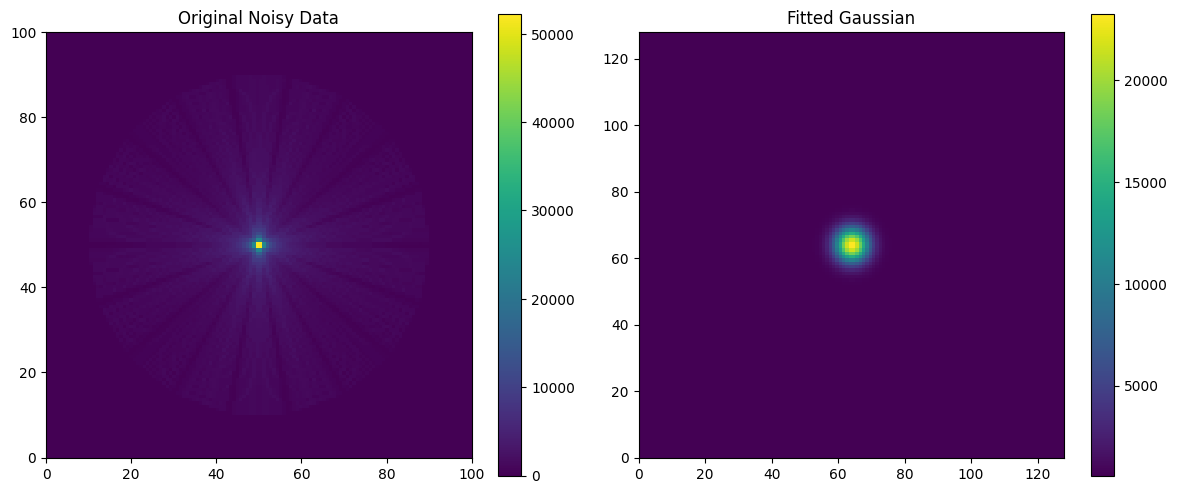

xsigma =  3.560345848628591
ysigma =  3.5176124603008128


In [18]:
from scipy.optimize import curve_fit

def gaussian_2d(xy, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    x, y = xy
    xo = float(xo)
    yo = float(yo)
    a = (np.cos(theta)**2) / (2*sigma_x**2) + (np.sin(theta)**2) / (2*sigma_y**2)
    b = -(np.sin(2*theta)) / (4*sigma_x**2) + (np.sin(2*theta)) / (4*sigma_y**2)
    c = (np.sin(theta)**2) / (2*sigma_x**2) + (np.cos(theta)**2) / (2*sigma_y**2)
    g = offset + amplitude * np.exp(-(a*((x - xo)**2) + 2*b*(x - xo)*(y - yo) + c*((y - yo)**2)))
    return g.ravel()
#pull data from above
x = np.array(coincidences['globalPosX1'])


# Generate a grid
data = reconstruct_pet_image(coincidences, image_size=128, pixel_size=8.0)
x = np.linspace(0, data.shape[1], num=data.shape[1])
y = np.linspace(0, data.shape[0], num=data.shape[0])
x, y = np.meshgrid(x, y)
bounds = (
    [0,     0,   0,    1,   1, -np.pi/2, np.min(data)],  # Lower bounds
    [np.max(data)*2, 100, 100, 50, 50,  np.pi/2, np.max(data)]  # Upper bounds
)
initial_guess = (
    np.max(data),      # amplitude
    50, 50,            # xo, yo (center of the image)
    10, 10,            # sigma_x, sigma_y
    0,                 # theta (rotation)
    np.min(data)
    # offset
)
popt, popv = curve_fit(gaussian_2d, (x, y), data.ravel(), p0=initial_guess, bounds=bounds, maxfev=10000)
fitted_data = gaussian_2d((x, y), *popt).reshape(128, 128)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Original Noisy Data")
plt.imshow(data, origin='lower', extent=(0, 100, 0, 100))
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Fitted Gaussian")
plt.contour(fitted_data, origin='lower', extent=(0, 100, 0, 100), levels=np.linspace(0, 100, 10))

plt.imshow(fitted_data, origin='lower', extent=(0, 128, 0, 128))
plt.colorbar()

plt.tight_layout()
plt.show()
print("xsigma = ", popt[3])
print("ysigma = ", popt[4])
#Lxe 0
# xsigma =  3.2470416223286773
# ysigma =  3.277545760691833
#Lxe 10
# xsigma =  3.442263269526914
# ysigma =  3.45225583933732
# #LXe 100
# xsigma =  3.9460949340695404
# ysigma =  3.916006839620296

#LYSO 0
# xsigma =  4.23276126737771
# ysigma =  4.1193270473439325
#LYSO 10
# xsigma =  4.238646138305225
# ysigma =  4.159289112157458
#LYSO 100
# xsigma =  4.178143143094513
# ysigma =  4.24527962004311

In [19]:
with open("LXeCoincidencesVRes/LXeShift75.txt", "a") as f:
    for i in range(488):
        N = 100 + 50 * (i+1)
        length = len(next(iter(coincidences.values())))
        N = min(N, length)
        random_indices = np.random.permutation(length)[:N]
        coincidences_temp = {key: value[random_indices] for key, value in coincidences.items()}
        # N = len(coincidences)
        #
        # N = min(N, len(coincidences))
        # random_indicies = np.random.permutation(len(coincidences))[:N]
        # coincidences = coincidences[random_indicies]
        #
        #print(f'took a random sample of {N} coincidences')
        reconstructed_image = reconstruct_pet_image(coincidences_temp, image_size=128, pixel_size=8.0)

        # Analyze results
        analyzed_image = analyze_reconstruction(reconstructed_image, pixel_size=8.0)
        x = np.array(coincidences_temp['globalPosX1'])


        # Generate a grid
        data = reconstruct_pet_image(coincidences_temp, image_size=128, pixel_size=8.0)
        x = np.linspace(0, data.shape[1], num=data.shape[1])
        y = np.linspace(0, data.shape[0], num=data.shape[0])
        x, y = np.meshgrid(x, y)
        bounds = (
            [0,     0,   0,    1,   1, -np.pi/2, np.min(data)],  # Lower bounds
            [np.max(data)*2, 100, 100, 50, 50,  np.pi/2, np.max(data)]  # Upper bounds
        )
        initial_guess = (
            np.max(data),      # amplitude
            50, 50,            # xo, yo (center of the image)
            10, 10,            # sigma_x, sigma_y
            0,                 # theta (rotation)
            np.min(data)
            # offset
        )
        popt, popv = curve_fit(gaussian_2d, (x, y), data.ravel(), p0=initial_guess, bounds=bounds, maxfev=10000)
        fitted_data = gaussian_2d((x, y), *popt).reshape(128, 128)
        print(f"{N}    {popt[3]}    {popt[4]}", file=f)



📊 CORRECT Back-Projection Reconstruction:
Image size: 128 x 128 pixels
Pixel size: 8.0 mm
Field of view: 1024.0 x 1024.0 mm²
Z slice: 0 ± 50 mm
Number of coincidences: 150
Coordinate ranges:
  X: -405.5 to 406.3 mm
  Y: -404.1 to 403.9 mm
  Z: -79.9 to 79.9 mm
Events passing energy filter: 150 (100.0%)
Events passing Z filter: 150 (100.0%)
Events passing both filters: 150 (100.0%)
Processing LORs...
  Processing LOR 1/150
Valid events used for reconstruction: 150
Total intensity in image: 13827
Maximum pixel value: 70.4

🔍 RECONSTRUCTION ANALYSIS:
Total counts in image: 13827
Maximum pixel value: 70.4
Mean pixel value: 0.844
Hot spots found: 170 pixels above 7.0
Center of mass: (-4.0, -3.9) mm

📊 CORRECT Back-Projection Reconstruction:
Image size: 128 x 128 pixels
Pixel size: 8.0 mm
Field of view: 1024.0 x 1024.0 mm²
Z slice: 0 ± 50 mm
Number of coincidences: 150
Coordinate ranges:
  X: -405.5 to 406.3 mm
  Y: -404.1 to 403.9 mm
  Z: -79.9 to 79.9 mm
Events passing energy filter: 150 